<a href="https://www.kaggle.com/code/dascient/variable-target-prediction-on-occupation-data?scriptVersionId=125980149" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [2]:
# lets begin!
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

salary = pd.read_csv('../input/salary-prediction-classification/salary.csv',header=0)

/kaggle/input/salary-prediction-classification/salary.csv


# Quick EDA

**View Data**

In [3]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
salary.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
salary

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


**Encode Data**

In [8]:
# crucial encoding
lb_make = LabelEncoder()
columns = salary.columns.values.tolist()
salary_encoded = salary[columns].copy()

# categorize/encode
for i in columns:
    salary_encoded[i] = lb_make.fit_transform(salary[i])

# encoded
salary_encoded.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,22,7,2671,9,12,4,1,1,4,1,25,0,39,39,0
1,33,6,2926,9,12,2,4,0,4,1,0,0,12,39,0
2,21,4,14086,11,8,0,6,1,4,1,0,0,39,39,0
3,36,4,15336,1,6,2,6,0,2,1,0,0,39,39,0
4,11,4,19355,9,12,2,10,5,2,0,0,0,39,5,0


**Visualize Encoded Data: Variable Pairing**

Below is a n/100000-sample seaborn pairplot with "education" set as the target feature.
I chose a small subset of the entire data, simply because the pairplot generation for that would take a pretty LONG time. Anyway, pairploit provides a decent variable-to-variable-relationship chart. So I firgured running it against a small sample qould suffice for the sake of time.

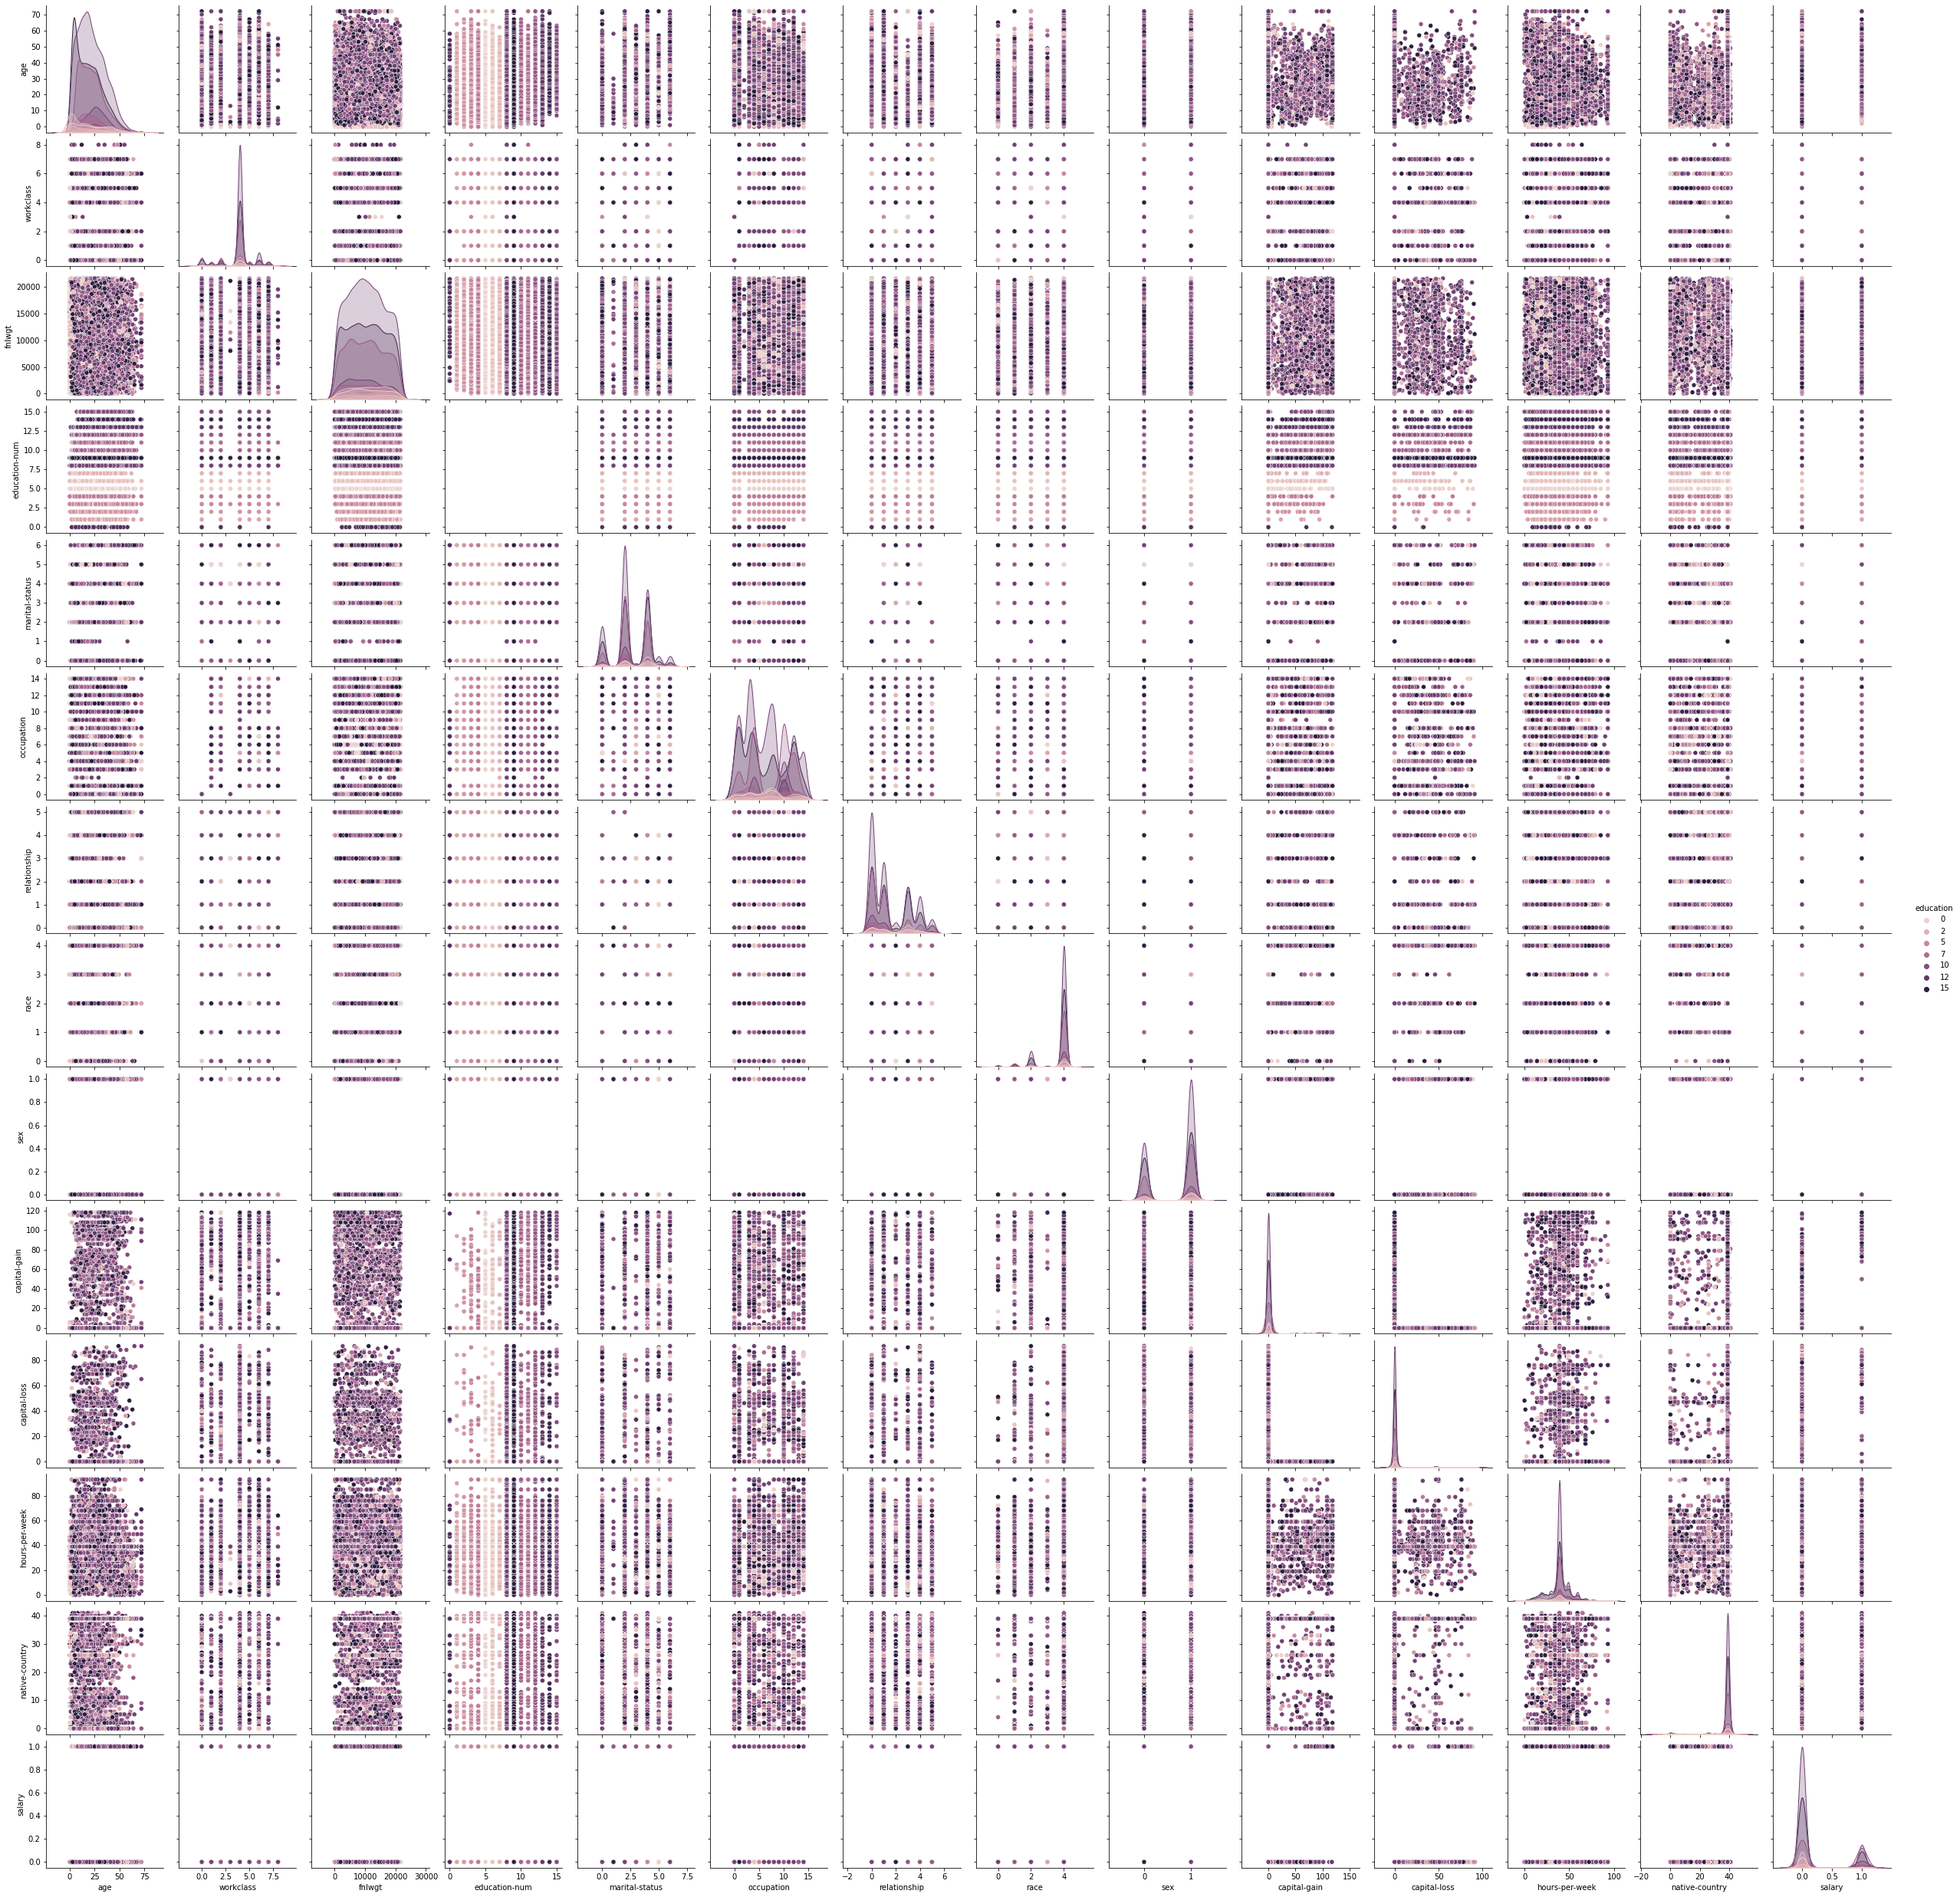

In [10]:
# pairplot
target = 'education'
sns.pairplot(salary_encoded.sample(int(len(salary_encoded/10000))),hue=target)

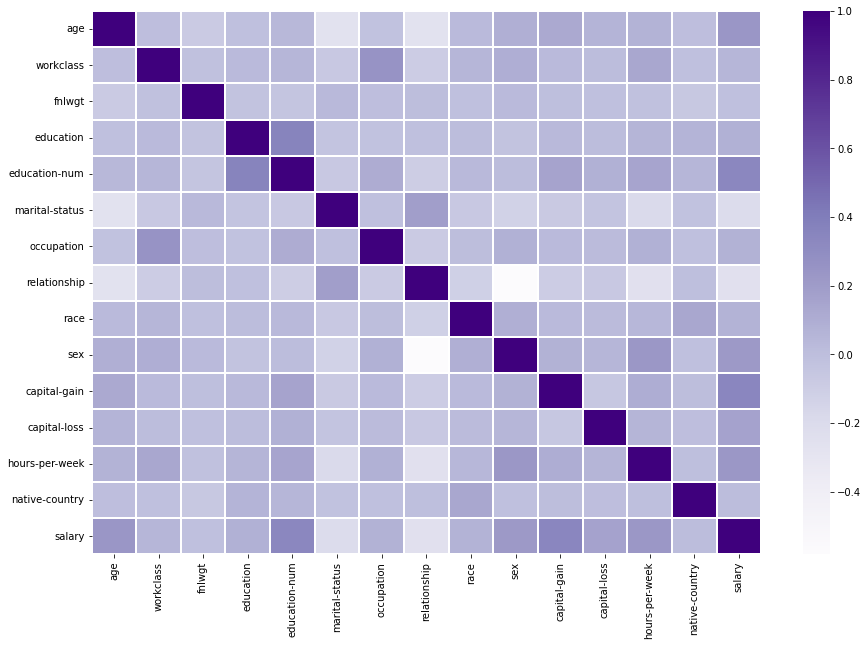

In [11]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 10)

corr = salary_encoded.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.01, cmap="Purples")
plt.show()

**Split Data into Training/Test Sets**

In [12]:
# user can input choice target
#target = input("target:")

X = salary_encoded.dropna().drop(columns=[target]).copy()
y = salary_encoded.dropna()[target].ravel().copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10746 entries, 14160 to 16068
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             10746 non-null  int64
 1   workclass       10746 non-null  int64
 2   fnlwgt          10746 non-null  int64
 3   education-num   10746 non-null  int64
 4   marital-status  10746 non-null  int64
 5   occupation      10746 non-null  int64
 6   relationship    10746 non-null  int64
 7   race            10746 non-null  int64
 8   sex             10746 non-null  int64
 9   capital-gain    10746 non-null  int64
 10  capital-loss    10746 non-null  int64
 11  hours-per-week  10746 non-null  int64
 12  native-country  10746 non-null  int64
 13  salary          10746 non-null  int64
dtypes: int64(14)
memory usage: 1.2 MB


**Train Classifier of Choice**

In [13]:
# classifier
#clf = RandomForestClassifier(max_depth=5, n_estimators=200, random_state=42).fit(X_train, y_train)
#clf = AdaBoostClassifier(n_estimators=200, random_state=42).fit(X_train, y_train)
clf = ExtraTreesClassifier(n_estimators=200, random_state=42).fit(X_train, y_train)
#clf = KNeighborsClassifier().fit(X_train, y_train)
#clf = MLPClassifier(alpha=1, max_iter=500).fit(X_train, y_train)

# results
train_predications = clf.predict(X_train)
train_score = clf.score(X_train, y_train)
predictions = clf.predict(X_test)
score = clf.score(X_test, y_test)
train_matrix = confusion_matrix(y_train, train_predications)
test_matrix = confusion_matrix(y_test, predictions)
print("Target:",target)
print("TRAIN SCORE:",train_score)
print("TEST SCORE:",score)

Target: education
TRAIN SCORE: 1.0
TEST SCORE: 0.9952540480178671


**Test Confusion Matrix**

In [14]:
df = pd.DataFrame(test_matrix)

df.style.background_gradient(cmap ='Spectral')\
        .set_properties(**{'font-size': '15px'})

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,307,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,377,0,0,0,0,0,0,0,0,0,5,0,0,0,0
2,0,0,128,0,0,0,0,0,0,0,0,23,0,0,0,0
3,0,0,0,44,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,104,8,1,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,220,1,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,1,172,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,347,0,4,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,433,0,0,0,0,0,0,7
9,0,0,0,0,0,0,0,0,0,1748,0,0,0,0,0,0


**Visual Miscalculations**

<AxesSubplot:>

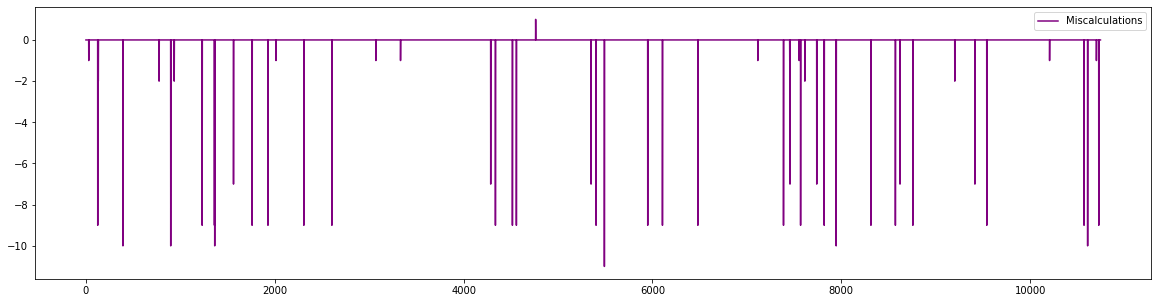

In [15]:
# noise
pd.DataFrame(y_test-clf.predict(X_test),columns=['Miscalculations']).plot(figsize=(20,5),c='purple')

# Variable Ensemble Classifier

In [27]:
# iterator
def classification_feat_importance(df_encoded):
    
    df_encoded = df_encoded.drop(columns=['capital-gain','capital-loss'])
    
    # iterate through each column variable as classification targets
    for target in df_encoded.columns.values:
        X = df_encoded.dropna().drop(columns=[target]).copy()
        y = df_encoded.dropna()[target].ravel().copy()

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
        
        
        # classifiers
        #clf1 = RandomForestClassifier(max_depth=5, n_estimators=200, random_state=42).fit(X_train, y_train)
        clf2 = AdaBoostClassifier(n_estimators=200, random_state=42).fit(X_train, y_train)
        #clf3 = ExtraTreesClassifier(n_estimators=200, random_state=42).fit(X_train, y_train)
        #clf4 = KNeighborsClassifier().fit(X_train, y_train)
        #clf5 = MLPClassifier(alpha=1, max_iter=500).fit(X_train, y_train)
        classifiers = [
                       #clf1, 
                       clf2, 
                       #clf3, 
                       #clf4, 
                       #clf5
                      ]

        for classifier in classifiers:
            results = []
            #test_matrix = confusion_matrix(y_test, clf.predict(X_test))
            results.append({"classifier":str(classifier).split("(")[0],"target":target,"test_score":classifier.score(X_test, y_test)})
            print("Classifier:",str(classifier).split("(")[0],"\t\tTarget:",target,"\tScore:",classifier.score(X_test, y_test))
            
    return pd.DataFrame(results)

In [ ]:
classification_feat_importance(salary_encoded)

# Now let's put this baby to work!
## Test Classifier Against Variable Target
### Steps
1. User inputs choice of target variable.
2. Machine chooses random data point in set of data, call it "use-case".
3. Encode randomly generated use case for ML.
4. Classify against present data.
5. Output predicted target value.

If the machine's prediction is wrong, start again from the cells below this. 

**1. User inputs choice of target variable.**

In [42]:

# choose target variable
#target = input("Enter target variable: ")
target = "education"

# quick proof of concept
a = salary.copy()

# find random sample
from random import randrange
idx = randrange(len(a))

**2. Machine chooses random data point in set of data, call it "use-case".**

In [43]:
# print random configuration item
b = pd.DataFrame(a.loc[idx]).T
print(f"{target}:",b.reset_index()[target][0])

# store sol'n
solution = b.reset_index()[target][0]

# print data point
b

education:  Some-college


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
11894,44,Private,174051,Some-college,10,Never-married,Other-service,Not-in-family,White,Male,0,0,35,United-States,<=50K


**3. Encode randomly generated use case for ML**

In [44]:
# categorize/encode entire dataframe(a)
def encode(df):
    lb_make = LabelEncoder()
    columns = df.columns.values.tolist()
    df_encoded = df[columns].copy()

    # categorize/encode
    for i in columns:
        df_encoded[i] = lb_make.fit_transform(df[i])

    # encoded
    return df_encoded

c = encode(a)
print("\nOriginal dataframe encoded.")


Original dataframe encoded.


**Encoded Data Entry Without Target Variable**

In [45]:
# print encoded item
use_case = pd.DataFrame(c.loc[idx]).T.drop(columns=[target]) 
#c

# print encoded item w/out target info
data = c.drop(columns=[target]) 
use_case

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
11894,27,4,9824,9,4,8,1,4,1,0,0,34,39,0


**Generate X-matrix & Target Vector**

**4. Classify against present data.**

In [46]:
# create X,y variables for ML
from sklearn.model_selection import train_test_split
def X_y_sets(df, target):
    X = df.dropna().drop(columns=[target]).copy()
    y = df.dropna()[target].ravel().copy()
    
    return train_test_split(X, y, test_size=0.33, random_state=42), X, y


# save trainer
print("\nResetting train data...\nCreating X-matrix & y-vector for classification.")
trainer = c.loc[c.index!=idx].dropna().copy()
X, y =  trainer.drop(columns=[target]), trainer[target].ravel()
X_train, X_test, y_train, y_test = X_y_sets(trainer, target)[0]


Resetting train data...
Creating X-matrix & y-vector for classification.


This is an example of the encoded X_train set. 

In [47]:
X_train.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
16069,27,4,5963,8,2,4,0,4,1,0,0,39,26,0
27585,34,4,5858,13,2,4,0,4,1,0,0,49,39,1
18011,27,2,20431,9,6,1,4,4,0,0,0,14,39,0
22473,15,4,4849,9,2,8,0,2,1,0,0,49,39,0
4585,10,4,912,11,4,8,1,4,1,0,0,39,39,0


This is a sample of the encoded y_train

In [48]:
y_train[0:5]

array([11, 12, 15, 15,  7])

**Decode Remapping**

The cell below remaps the encoded values back to their original form (e.g. the occupational data)

In [49]:
# encoded variable re-mapping
def encoding_remap(df, df_encoded, target):
    
    X_test = X_y_sets(df, target)[0][0]
    
    remap = pd.merge(df_encoded.loc[df_encoded.index.isin(X_test.index.values)][target].reset_index(),
              df.loc[df.index.isin(X_test.index.values)][[target]].reset_index(),on=['index'])
    
    remap[target] = [str(remap[f'{target}_y'][i]) for i,v in remap[f'{target}_x'].items()]
    remap['index'] = np.array([str(remap[f'{target}_x'][i]) for i,v in remap[f'{target}_x'].items()]).astype(int)
    remap=remap[[target,'index']]
    remap = remap.set_index('index').drop_duplicates().sort_values('index')
    
    return remap

# specific to our current target choice
d = encoding_remap(a, c, target)

**Use Classifier To Predict Target Value**

The cell below runs the classifier to predict the our subject's targeted educational background. 

The results using AdaBoost are NOT robust. If you have the time to test the confidence of each classifier, please feel free to uncomment any of the classifiers specified above.

In [50]:
print("\nLive prediction\n")

# choose classifier
#clf = GradientBoostingClassifier(criterion="friedman_mse", init=None, learning_rate=0.033, loss='deviance', max_depth=19, max_features=None, max_leaf_nodes=None, min_samples_leaf=60, min_samples_split=120, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=42, subsample=1.0, verbose=1, warm_start=False).fit(X_train, y_train)
#clf = RandomForestClassifier(max_depth=5, n_estimators=200, random_state=42).fit(X_train, y_train)
#clf = ExtraTreesClassifier(n_estimators=200, random_state=42).fit(X_train, y_train)
clf = AdaBoostClassifier(n_estimators=200, random_state=42).fit(X_train, y_train)
#clf = MLPClassifier(alpha=1, max_iter=500).fit(X_train, y_train)
#clf = KNeighborsClassifier().fit(X_train, y_train)


print()
print("Test score: ",clf.score(X_test, y_test))
print()
prediction = clf.predict(use_case)[0]
print(f"Prediction {target}:",prediction)


# print decoded prediction
print("\nPrediction Decoded")
e = d[d.index == prediction]
e


Live prediction


Test score:  0.7158678455095393

Prediction education: 15

Prediction Decoded


,education
index,
15,Some-college


**Prediction Correct?**

In [51]:
if solution == e.reset_index()[target][0]:
    print("Machine's prediction was correct!")
else:
    print("Machine's prediction was incorrect :(")

Machine's prediction was correct!


# Supplementary

In [ ]:
# encoding
from sklearn.preprocessing import LabelEncoder
def encode(df):
    lb_make = LabelEncoder()
    columns = df.columns.values.tolist()
    df_encoded = df[columns].copy()

    # categorize/encode
    for i in columns:
        df_encoded[i] = lb_make.fit_transform(df[i])

    # encoded
    return df_encoded


# encoded variable re-mapping
def encoding_remap(df, df_encoded, target):
    
    X_test = X_y_sets(df, target)[0][0]
    
    remap = pd.merge(df_encoded.loc[df_encoded.index.isin(X_test.index.values)][target].reset_index(),
              df.loc[df.index.isin(X_test.index.values)][[target]].reset_index(),on=['index'])
    
    remap[target] = [str(remap[f'{target}_y'][i]) for i,v in remap[f'{target}_x'].items()]
    remap['index'] = np.array([str(remap[f'{target}_x'][i]) for i,v in remap[f'{target}_x'].items()]).astype(int)
    remap=remap[[target,'index']]
    remap = remap.set_index('index').drop_duplicates().sort_values('index')
    
    return remap


# pairplot
import seaborn as sns
def pairplot(df, target):
    return sns.pairplot(df.sample(int(len(df/10000))),hue=target)
    
    
# create X,y variables for ML
from sklearn.model_selection import train_test_split
def X_y_sets(df, target):
    X = df.dropna().drop(columns=[target]).copy()
    y = df.dropna()[target].ravel().copy()
    
    return train_test_split(X, y, test_size=0.33, random_state=42), X, y


# classifier iteration
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
def classification_feat_importance(df_encoded):
    
    df_encoded = df_encoded.drop(columns=['capital-gain','capital-loss'])
    
    # iterate through each column variable as classification targets
    for target in df_encoded.columns.values:
        X = df_encoded.dropna().drop(columns=[target]).copy()
        y = df_encoded.dropna()[target].ravel().copy()

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
        
        
        # classifiers
        clf1 = RandomForestClassifier(max_depth=5, n_estimators=200, random_state=42).fit(X_train, y_train)
        clf2 = AdaBoostClassifier(n_estimators=200, random_state=42).fit(X_train, y_train)
        clf3 = ExtraTreesClassifier(n_estimators=200, random_state=42).fit(X_train, y_train)
        clf4 = KNeighborsClassifier().fit(X_train, y_train)
        clf5 = MLPClassifier(alpha=1, max_iter=500).fit(X_train, y_train)
        classifiers = [
                       clf1, 
                       clf2, 
                       clf3, 
                       clf4, 
                       clf5
                      ]

        for classifier in classifiers:
            results = []
            #test_matrix = confusion_matrix(y_test, clf.predict(X_test))
            results.append({"classifier":str(classifier).split("(")[0],"target":target,"test_score":classifier.score(X_test, y_test)})
            print("Classifier:",str(classifier).split("(")[0],"\t\tTarget:",target,"\tScore:",classifier.score(X_test, y_test))
            
    return pd.DataFrame(results)

In [ ]:
# en fin